In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv('./csvfile/finaldata.csv')
data=data.drop('Unnamed: 0',axis=1)

## 7个城市的二手房数量

city
深圳    37227
广州    31113
佛山    15553
惠州    14311
东莞     9479
中山     5837
珠海     3103
Name: area1, dtype: int64

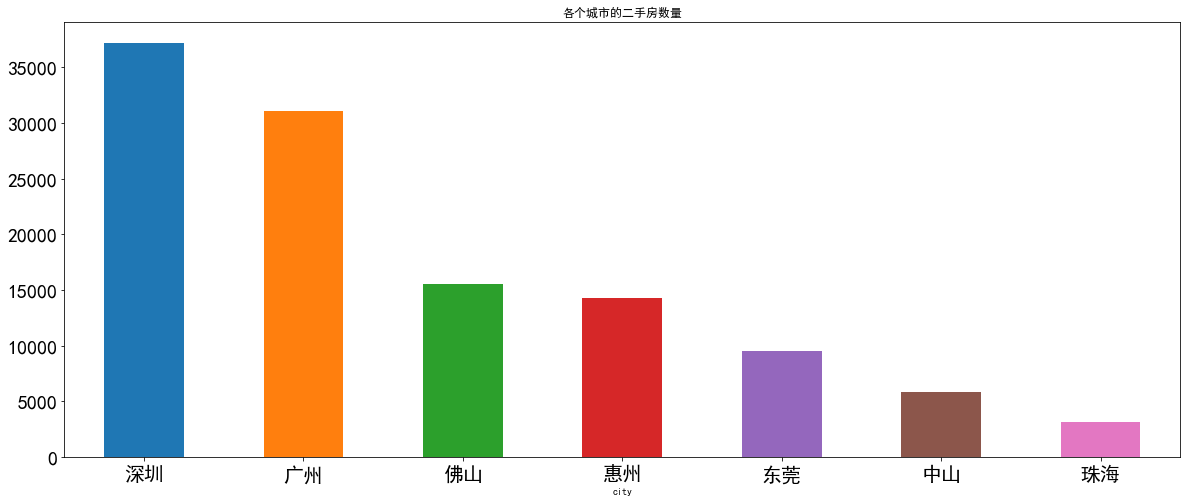

In [3]:
import matplotlib as mpl
mpl.rcParams['font.family']='simhei'
mpl.rcParams['axes.unicode_minus']=False # 处理负号问题       # 解决保存图像是负号'-'显示为方块的问题
city_data=data.groupby(by="city").count()['area1']
city_data=city_data.sort_values(ascending=False)
city_data.plot.bar(figsize=(20,8),fontsize=20,rot=0,title="各个城市的二手房数量")
city_data

In [4]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """
    
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


# 7个城市的小镇,地区的二手房数量分布

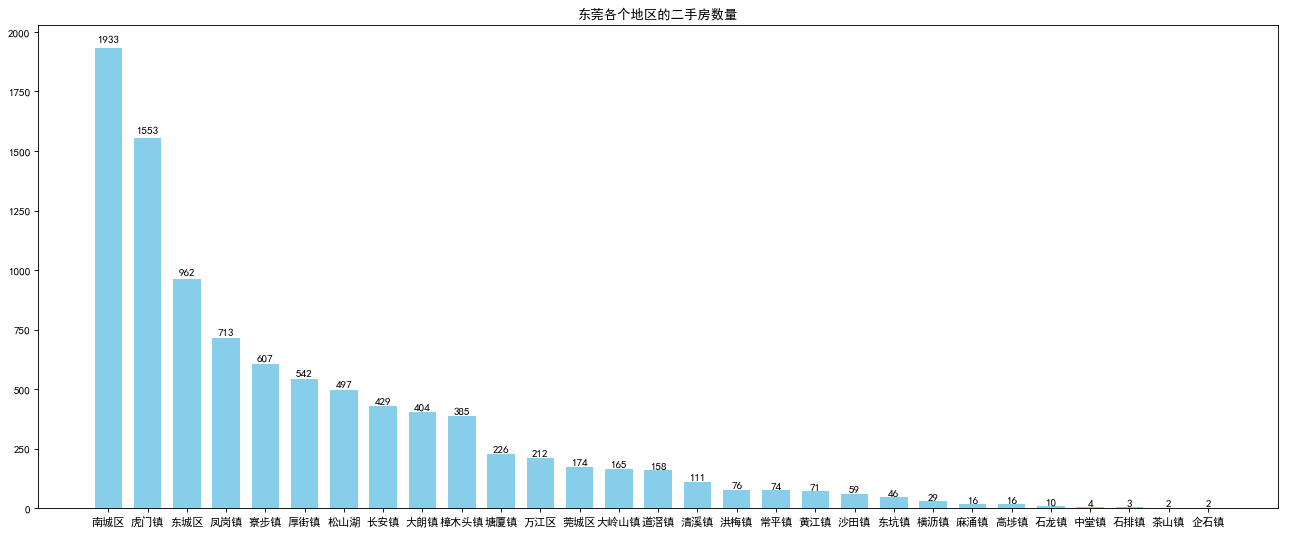

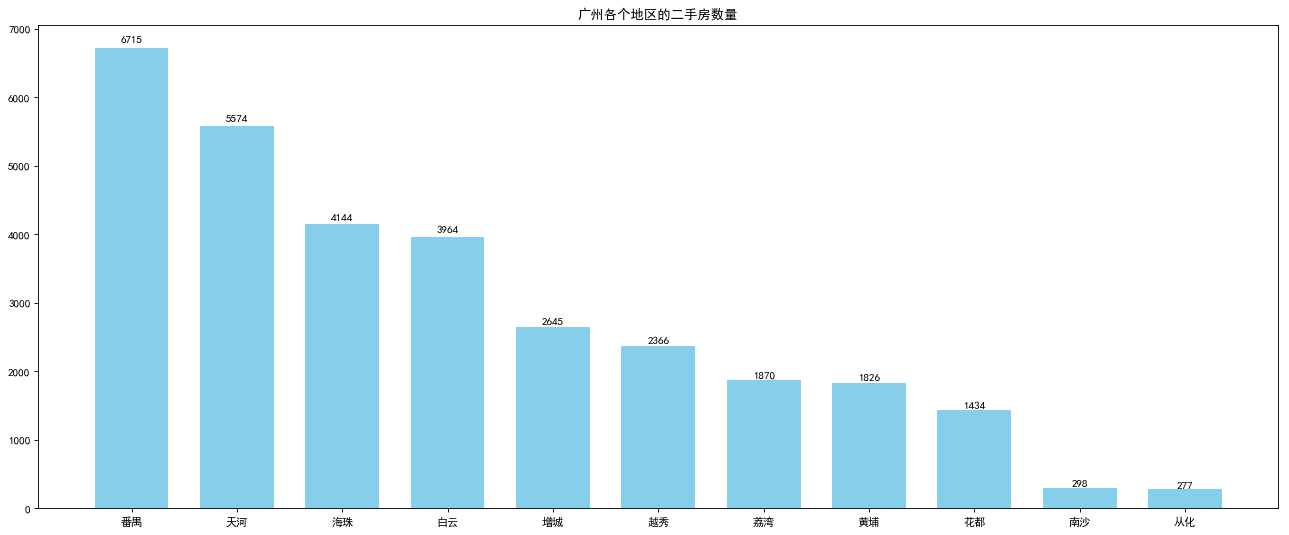

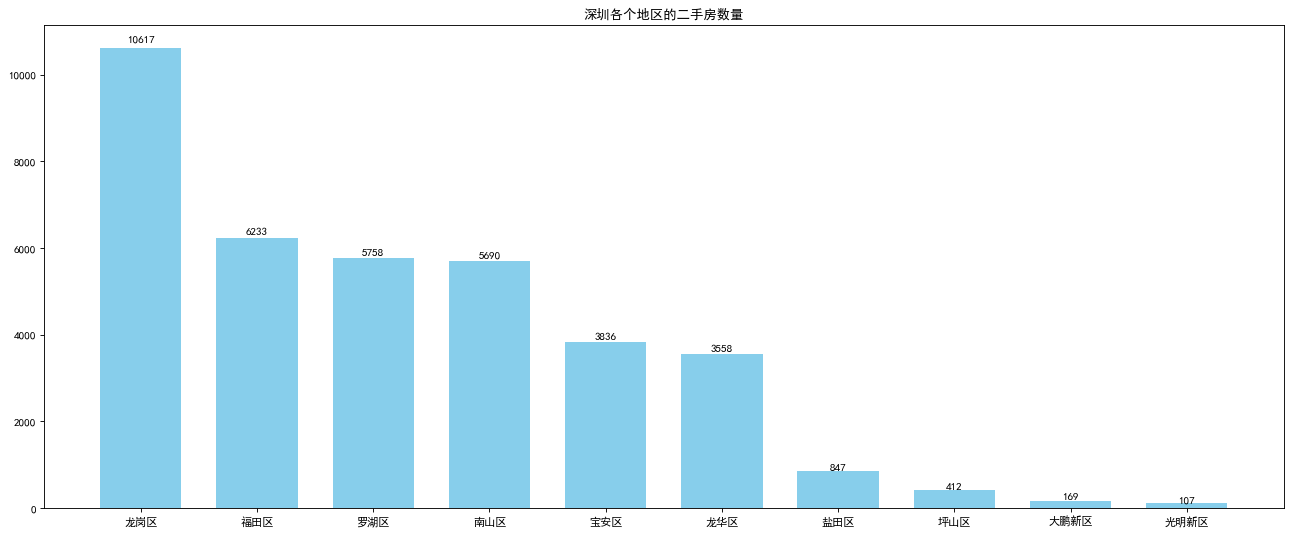

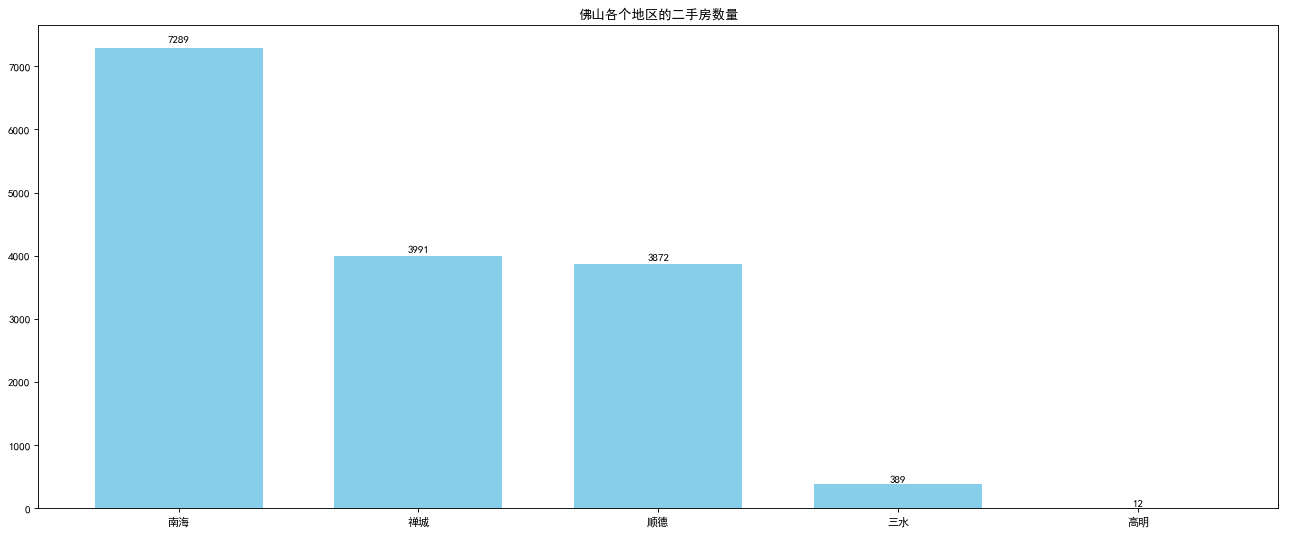

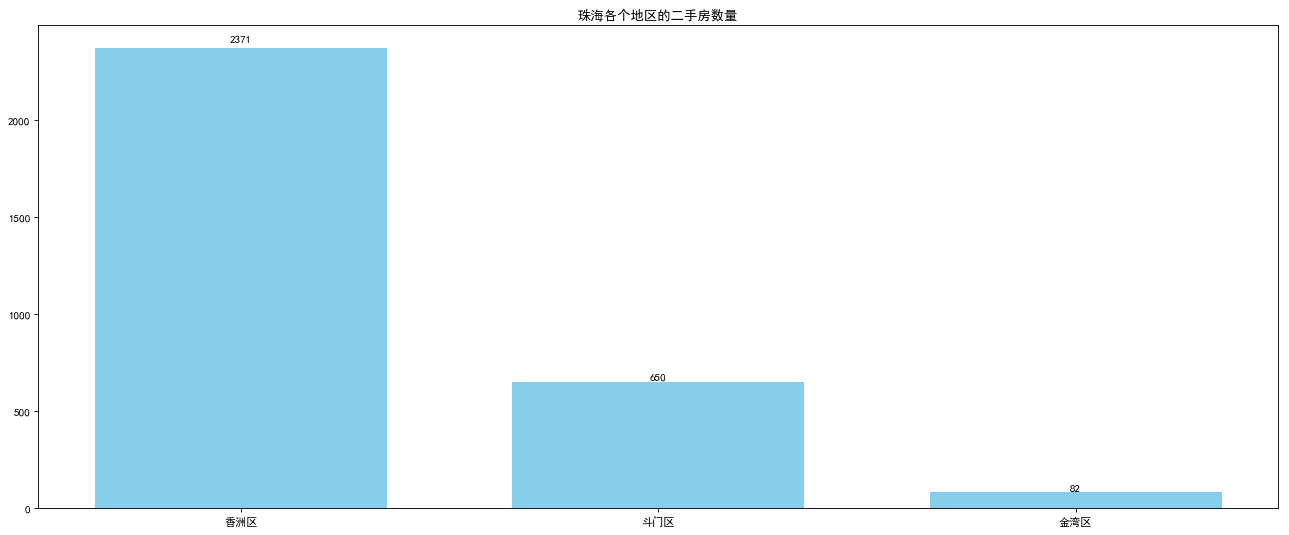

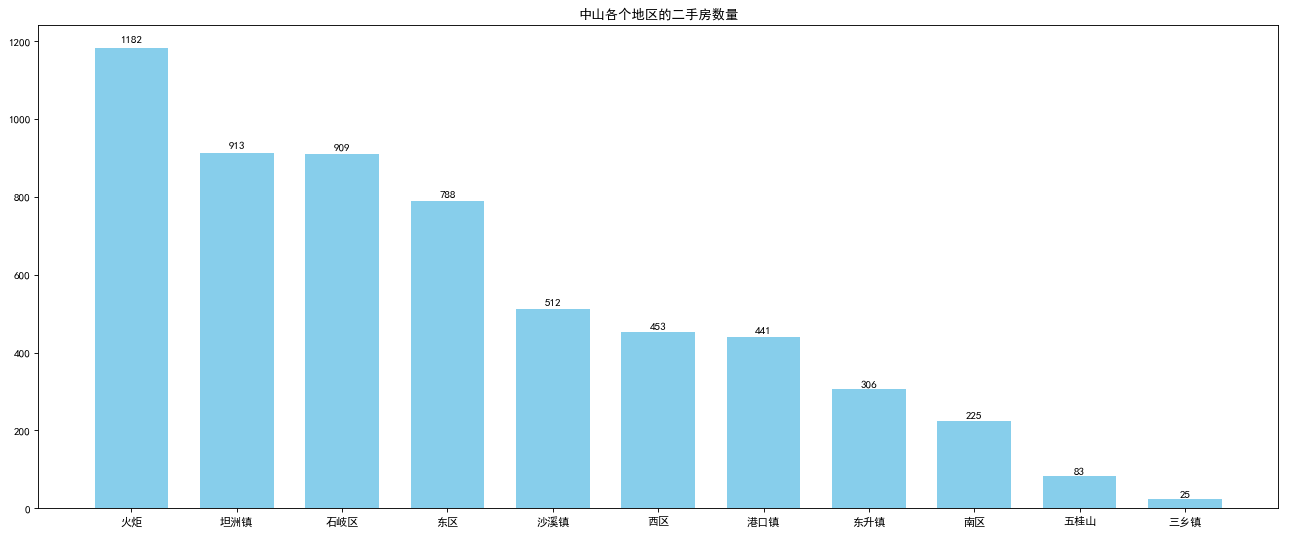

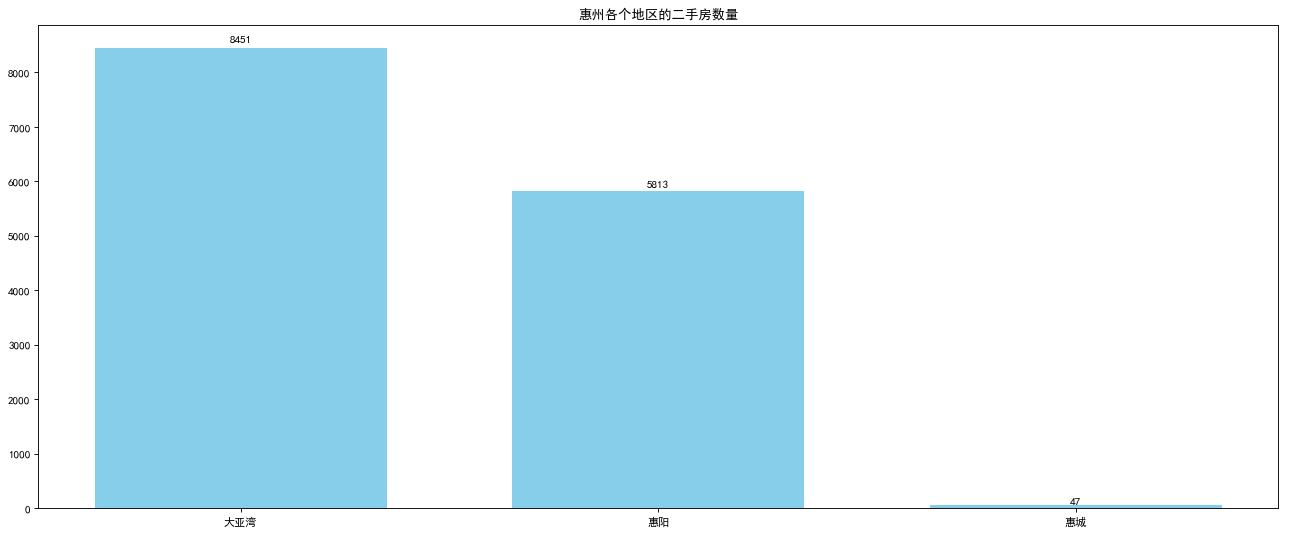

In [5]:
dict={'dg':'东莞','gz':'广州','sz':'深圳','fs':'佛山','zh':'珠海','zs':'中山','hui':'惠州'}
def autolabel(rects, xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')
for i in dict:
    city=dict[i]
    area1_data=data[data['city']==city]
    group_by_area1_data=area1_data.groupby(by="area1").count()['city'].sort_values(ascending=False)#对每个city的area1分组并且排好序
    
    x=group_by_area1_data.index.tolist()
    y=group_by_area1_data.values.tolist()
    width = 0.7  # the width of the bars
    fig, ax = plt.subplots(figsize=(20,8),dpi=80)
    rects1 = ax.bar(x, y, width, color='SkyBlue')
    plt.title('{}各个地区的二手房数量'.format(city))
    autolabel(rects1, "center")
#     plt.savefig('{}各个地区的二手房数量.png'.format(city))
    plt.show()

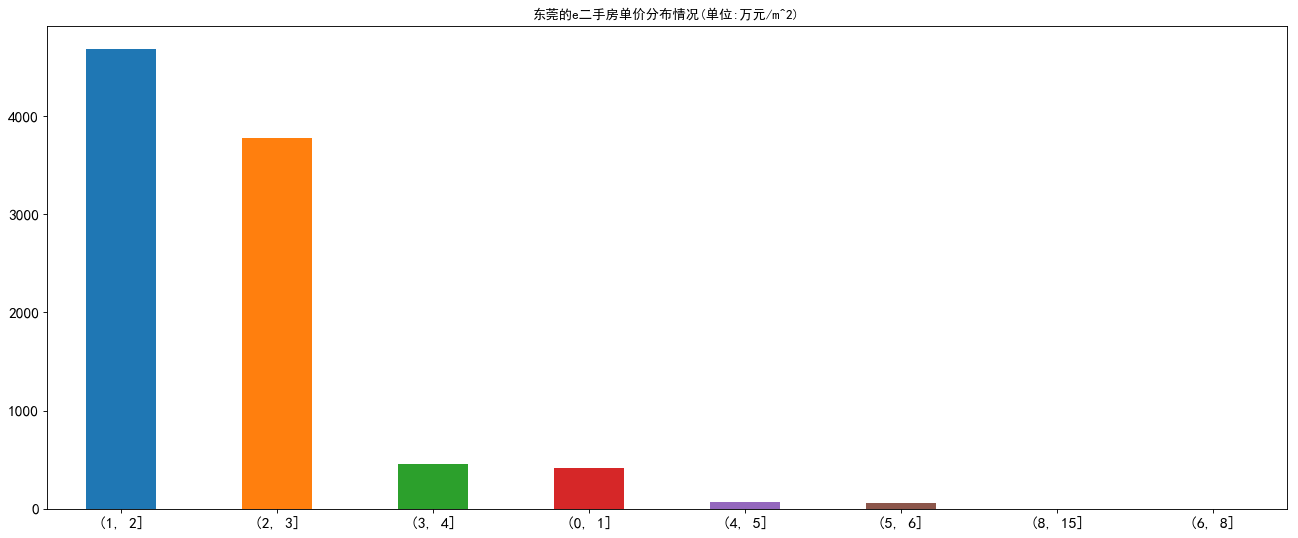

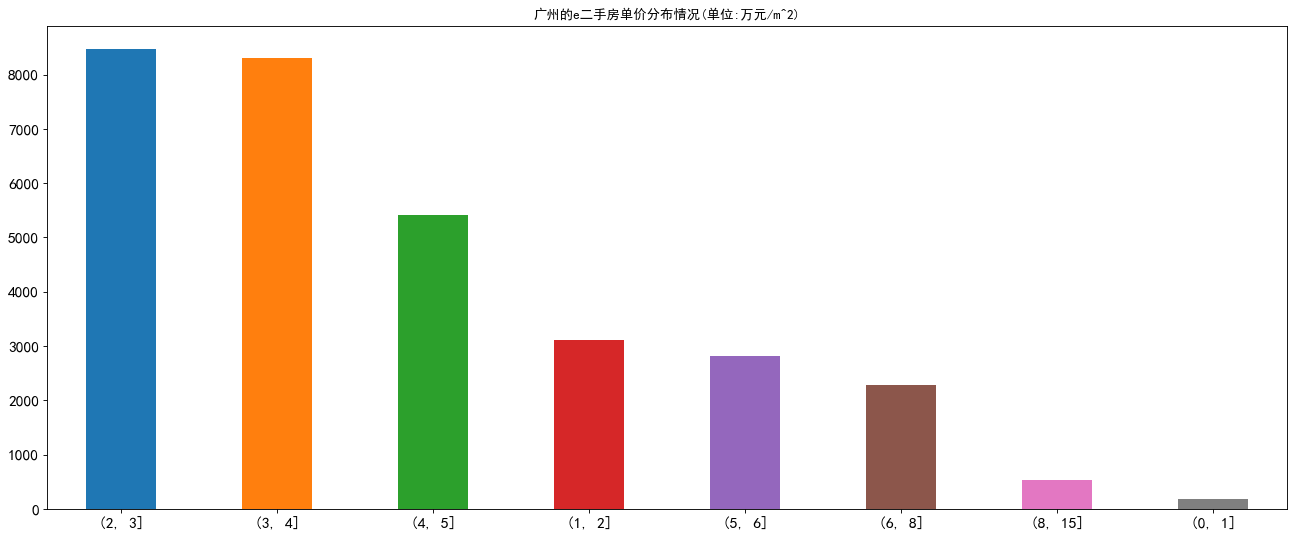

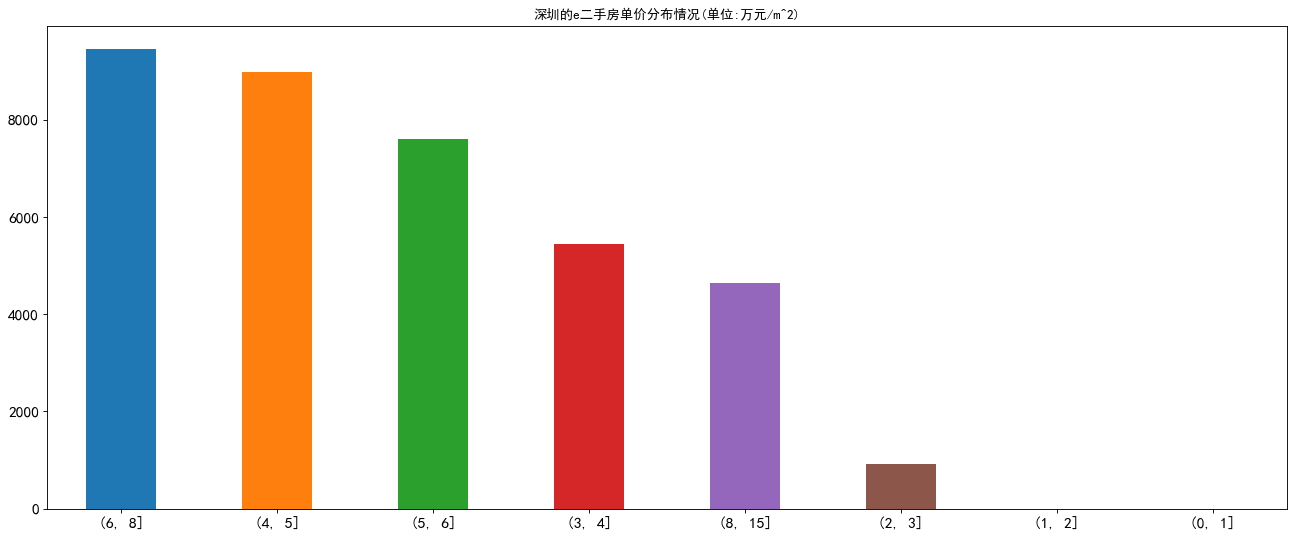

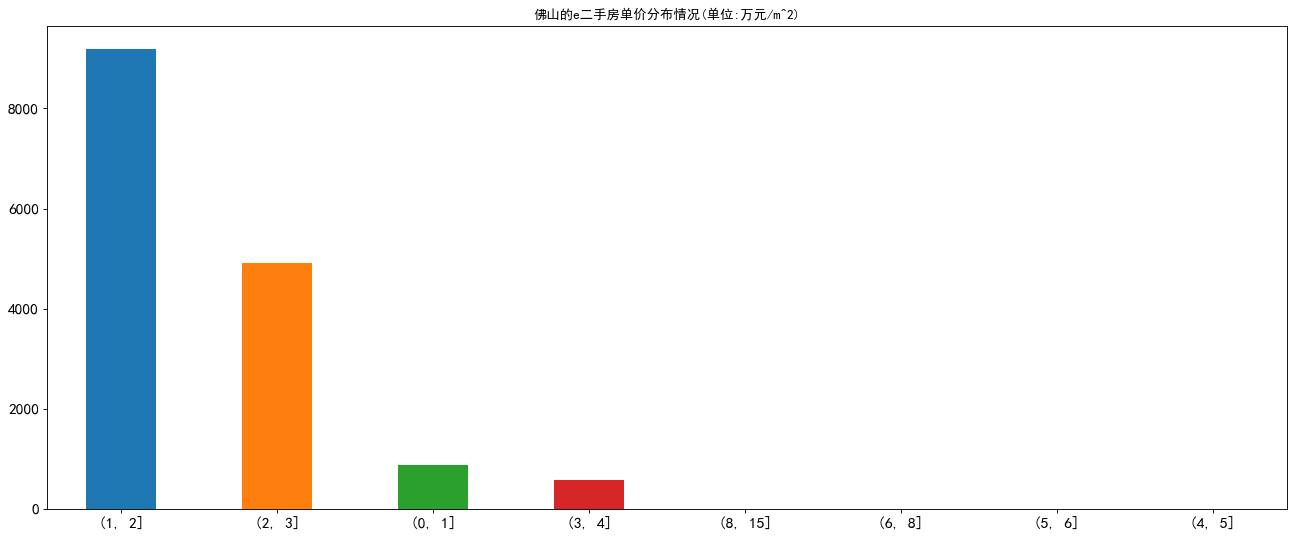

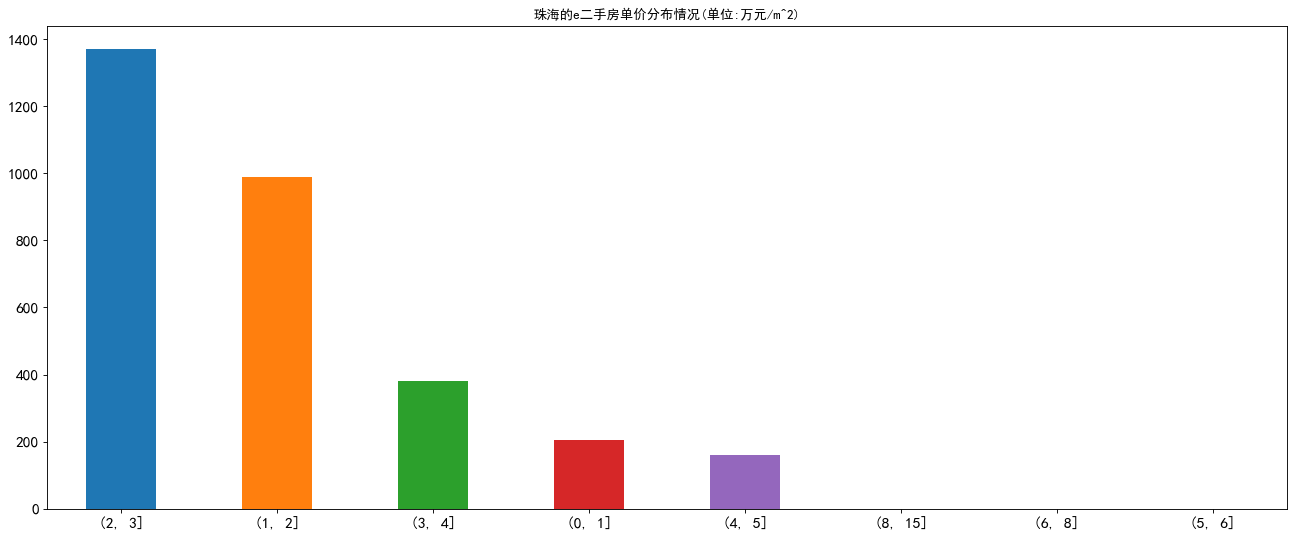

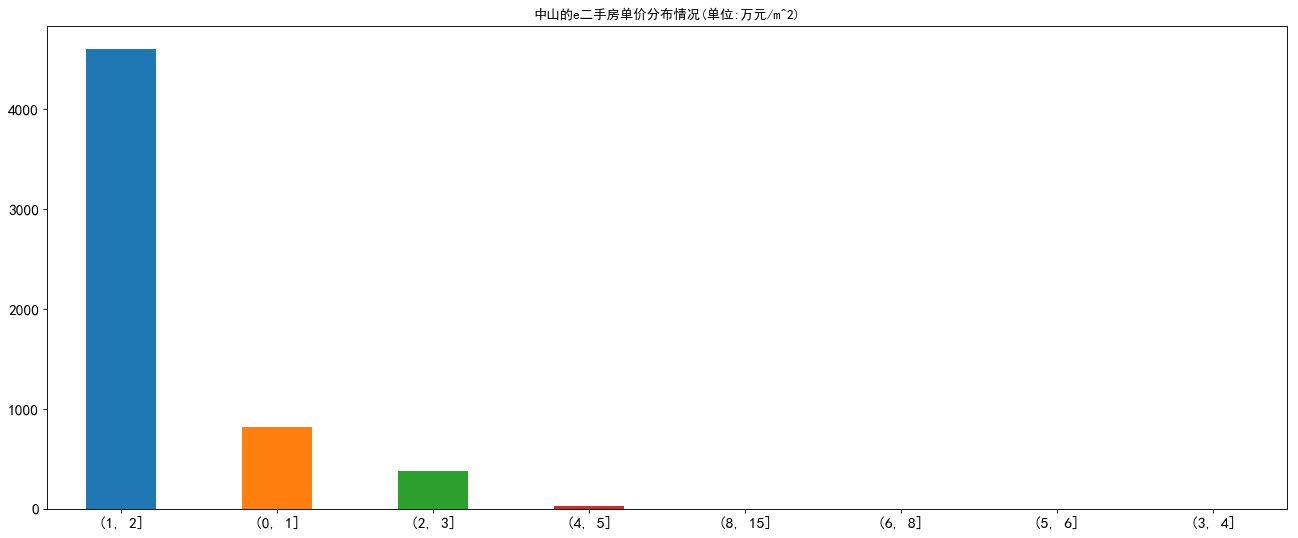

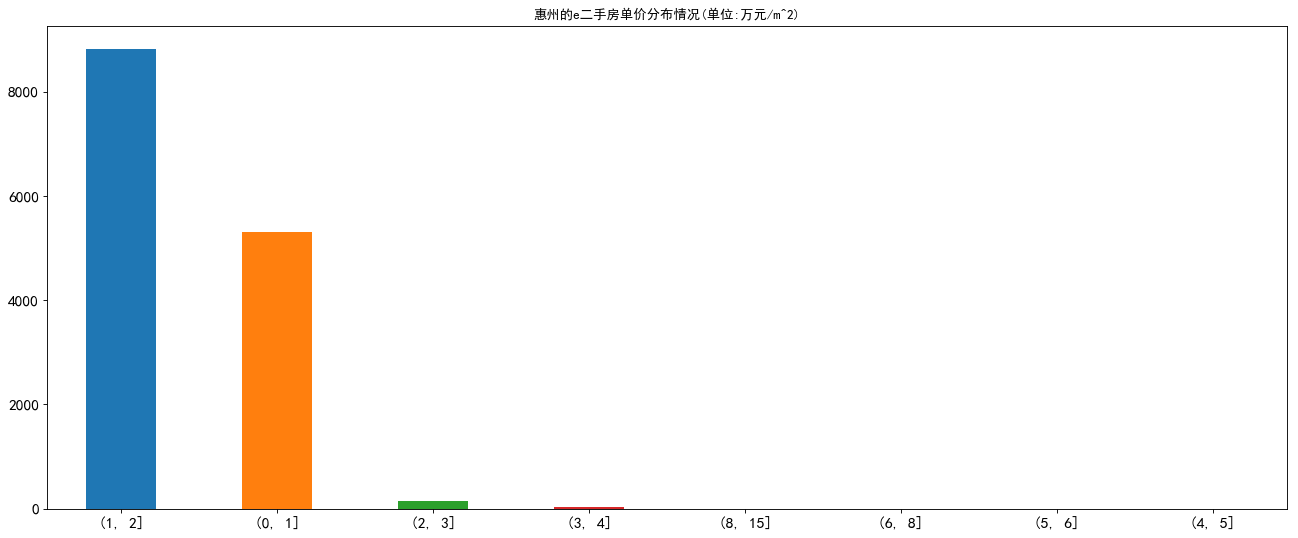

In [6]:
bins=[0,1,2,3,4,5,6,8,15]
for i in dict:
    city=dict[i]
    each_city_data=data[data['city']==city]
    plt.figure(figsize=(20,8),dpi=80)
    rects=pd.cut(each_city_data['unit_Price'],bins).value_counts().plot.bar(width=0.45,fontsize=14,rot=0)
    plt.title('{}的e二手房单价分布情况(单位:万元/m^2)'.format(city))
#     plt.savefig('{}的e二手房单价分布情况.png'.format(city))
    plt.show()

In [24]:
dict={'dg':'东莞','gz':'广州','sz':'深圳','fs':'佛山','zh':'珠海','zs':'中山','hui':'惠州'}
grouby_city_data=data.groupby(by="city").count()['area1'].T

In [34]:
for i in dict:
    num=round((grouby_city_data[dict[i]]/grouby_city_data.sum())*100,2)
    print('{city}二手房占比为{num}%'.format(city=dict[i],num=num))

东莞二手房占比为8.13%
广州二手房占比为26.68%
深圳二手房占比为31.92%
佛山二手房占比为13.34%
珠海二手房占比为2.66%
中山二手房占比为5.01%
惠州二手房占比为12.27%


In [35]:
data.pivot_table('unit_Price',index='city',columns='type',aggfunc=sum)

type,动迁安置房,商品房,房改房,私产,经济适用房,自建房,集资房
city,,,,,,,
东莞,NaN,19337.9980,NaN,3.5219,NaN,NaN,NaN
中山,NaN,8181.1179,NaN,NaN,NaN,33.0421,NaN
佛山,2.1554,28215.0772,13.1259,NaN,5.3061,NaN,1.1028
广州,10.9287,114733.4808,249.8650,215.2499,9.4491,NaN,3.0421
惠州,NaN,16141.4328,NaN,NaN,NaN,NaN,NaN
深圳,NaN,217507.4589,NaN,NaN,NaN,NaN,NaN
珠海,109.3551,6917.8140,34.5039,NaN,NaN,NaN,NaN


# 饼状图
